In [15]:
library(dplyr)
library(ggplot2)

In [3]:
df_census <- read.csv(file = 'census1994.csv')
df_census <- subset(df_census,WorkClass!=' ?' & occupation!=' ?' & native.country!=' ?')
head(df_census,10)

ï..Date,Age,WorkClass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,class
3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
11/28/1994,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
3/2/1994,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
11/27/1994,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
12/25/1994,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10/10/1994,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [22]:
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print(">>Task 1-a: Details of df_data data frame are: \n")
print(is.data.frame(df_census))
print(ncol(df_census))
print(nrow(df_census))
print(colnames(df_census))

#Task 1-b: Find the number of rows and columns in the df_data data frame.
print("\n\n>>Task 1-b: Number of rows and number of columns:")
print(dim(df_census))

#Task 1-c: Print the descriptive details (min, max, quartiles etc) for 'Age' column of the df_census
print("\n\n>>Task 1-c: Descriptive details for 'Age' column are\n")
print(summary(df_census$Age))

#Task 1-d: Print the number of unique values for 'education_num' and 'hours_per_week' columns
print("\n\n >>Task 1-d:")
# print("#####################################################")
number_unique_education <- nrow(unique(df_census[c("education.num")]))
number_unique_week <- nrow(unique(df_census[c("hours.per.week")]))

sprintf("Task 1-d: The number of unique 1 :%d", number_unique_education)
sprintf("Task 1-d: The number of unique 2 :%d", number_unique_week)


[1] ">>Task 1-a: Details of df_data data frame are: \n"
[1] TRUE
[1] 17
[1] 30162
 [1] "ï..Date"        "Age"            "WorkClass"      "fnlwgt"        
 [5] "education"      "education.num"  "marital.status" "occupation"    
 [9] "relationship"   "race"           "gender"         "capital.gain"  
[13] "capital.loss"   "hours.per.week" "native.country" "class"         
[17] "Survey_Month"  
[1] "\n\n>>Task 1-b: Number of rows and number of columns:"
[1] 30162    17
[1] "\n\n>>Task 1-c: Descriptive details for 'Age' column are\n"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.44   47.00   90.00 
[1] "\n\n >>Task 1-d:"


[1] "Task 1-d: The number of unique 1 :16"

[1] "Task 1-d: The number of unique 2 :94"

In [54]:
#print(df_census['education'])

In [29]:

#Task 2-a: Find out the sum of Captial Gain for people with education level as Bachelors and HS-Grad.
paste("Task 2-a: The sum of capital gain for education level as bachelors is and as HS-Grad is")


required1 <- subset(df_census,(education==' Bachelors'))
required2 <- subset(df_census,(education==' HS-grad'))
bachelor_sum=sum(required1['capital.gain'])
graduate_sum=sum(required2['capital.gain'])
print('The sum of capital gain for education level as bachelors is')
print(bachelor_sum)
print('The sum of capital gain for education level as HS-Grad is')
print(graduate_sum)


#Task 2-b: Find out the total number of people surveyed in months may, october and december.
#Create a new column for 'Survey_Month' by using 'Date' column
#write the code for extracting the month from the date column here

df_census$Survey_Month <- as.Date(df_census$ï..Date, format = "%m/%d/%Y")
df_census$Survey_Month <- months(df_census$Survey_Month)
# df_census
# ###############send you code here
may_mon <- subset(df_census, (Survey_Month == 'May'))
number_surveys_may <- nrow(may_mon)
october_mon <- subset(df_census, (Survey_Month == 'October'))
number_surveys_october <- nrow(october_mon)
december_mon <- subset(df_census, (Survey_Month == 'December'))
number_surveys_december <- nrow(december_mon)
sprintf("Task 2-b: The total number of surveys in may is %d, in october is %d, and in december is %d",number_surveys_may, number_surveys_october, number_surveys_december)


#Task 2-c: Let us now use multiple filtering criteria
number_surveys_september <- nrow(subset(df_census, (Survey_Month == 'September') & (WorkClass == ' Private') & Age < 50))
number_surveys_november <- nrow(subset(df_census, (Survey_Month == 'November') & (WorkClass == ' Private') & Age < 50))
sprintf("Task 2-c: The total number of surveys that meet the given conditions in september is %d and in november is %d",number_surveys_september, number_surveys_november)


#Task 2-d: Find out 3 least surveyed education categories, print their names and corresponding number of surveys for 
#periods January-June and July-December.
set_1 <- c('January','February','March','April','May','June')
set_2 <- c('July','August','September','October','November','December')
df_twod <- df_census %>% group_by(Survey_Month,education) %>% summarise(count = n())
df_param1 <- df_twod %>% filter(Survey_Month %in% set_1)
df_param2 <- df_twod %>% filter(Survey_Month %in% set_2)
order_param1 <- df_param1[order(df_param1$count),]
order_param2 <- df_param2[order(df_param2$count),]
duplicate_param1 <- order_param1[!duplicated(order_param1$education),]
duplicate_param2 <- order_param2[!duplicated(order_param2$education),]
final_param1 <- head(duplicate_param1,3)
final_param2 <- head(duplicate_param2,3)
# final_param2
print("Task 2-d: The top 3 least surveyed education categories in January-June:")
print(final_param1)
print("Task 2-d: The top 3 least surveyed education categories in July-December:")
print(final_param2)


#Task 2-e: Find out top 5 native-countries besides United-States, print their names and number of surveys belonging 
#to each.
df_task2e <- df_census %>% group_by(native.country) %>% summarise(count = n())
order_task2e <- df_task2e[order(-df_task2e$count),]
final_task2e <- order_task2e[2:6,]
print ("Task 2-e: The top 5 most surveyed native countries :")
print(final_task2e)

#Task 2-f: Find out Top-5 native-countries with the most number of samples belonging to class >50K
df_task2f <- df_census %>% group_by(native.country,class) %>% summarise(sum = sum(as.numeric(fnlwgt))) #sum(as.numeric(fnlwgt))
sub_task2f <- subset(df_task2f, (class == ' >50K'))
order_task2f <- sub_task2f[order(-sub_task2f$sum),]
final_task2f <- head(order_task2f,5)
print ("Task 2-f: The top 5 native countries with the most number of surveys with class >50K:")
print(final_task2f)


[1] "Task 2-a: The sum of capital gain for education level as bachelors is and as HS-Grad is"

[1] "The sum of capital gain for education level as bachelors is"
[1] 8751485
[1] "The sum of capital gain for education level as HS-Grad is"
[1] 5799557


[1] "Task 2-b: The total number of surveys in may is 2510, in october is 2510, and in december is 2602"

[1] "Task 2-c: The total number of surveys that meet the given conditions in september is 1465 and in november is 1507"

[1] "Task 2-d: The top 3 least surveyed education categories in January-June:"
# A tibble: 3 x 3
# Groups:   Survey_Month [2]
  Survey_Month education    count
  <chr>        <fct>        <int>
1 February     " Preschool"     2
2 January      " 1st-4th"       7
3 February     " 5th-6th"      15
[1] "Task 2-d: The top 3 least surveyed education categories in July-December:"
# A tibble: 3 x 3
# Groups:   Survey_Month [2]
  Survey_Month education    count
  <chr>        <fct>        <int>
1 July         " Preschool"     3
2 November     " 1st-4th"       9
3 November     " 5th-6th"      15
[1] "Task 2-e: The top 5 most surveyed native countries :"
# A tibble: 5 x 2
  native.country count
  <fct>          <int>
1 " Mexico"        610
2 " Philippines"   188
3 " Germany"       128
4 " Puerto-Rico"   109
5 " Canada"        107
[1] "Task 2-f: The top 5 native countries with the most number of surveys with class >50K:"
# A tibble: 5 x 3
# Groups:   native.country [5]
  native.country   class    

[1] "Task 3-a"


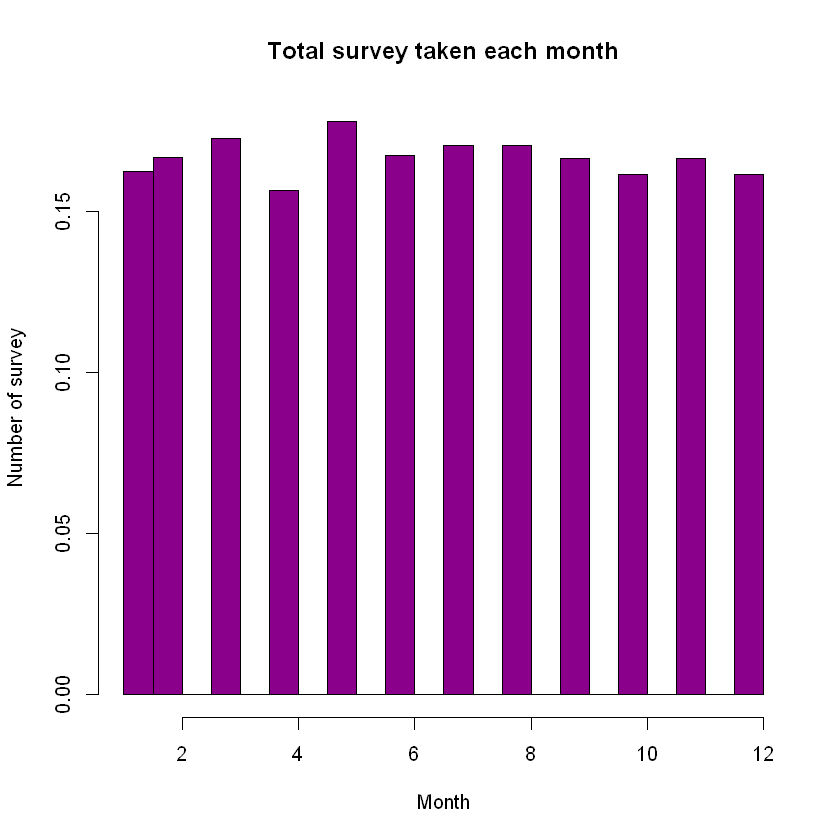

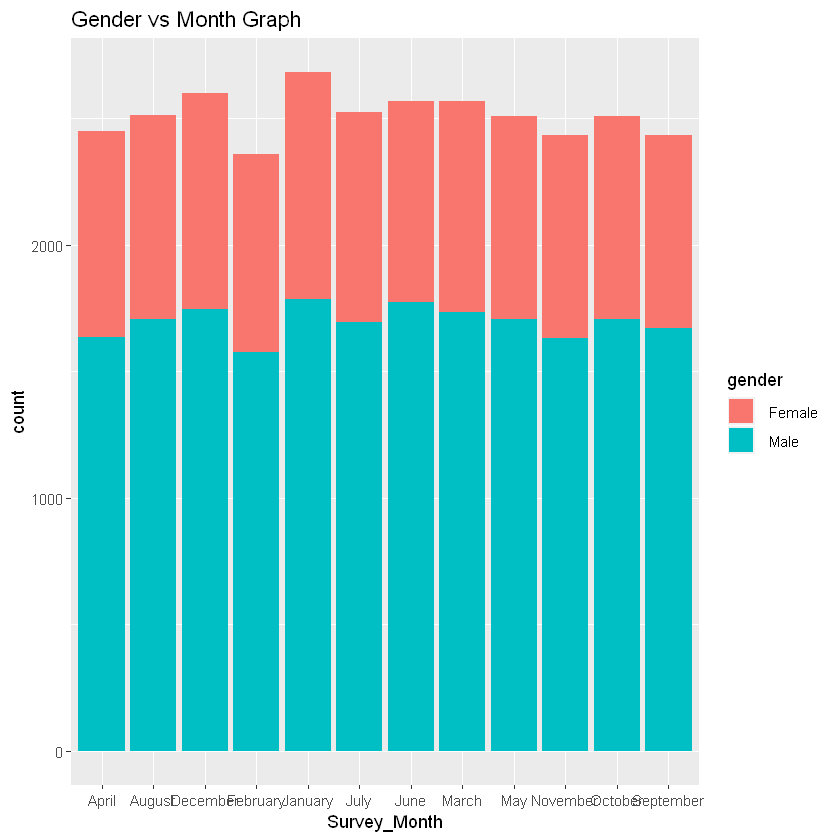

native.country,class,sum
United-States,>50K,6995
Philippines,>50K,60
Germany,>50K,44
India,>50K,40
Canada,>50K,36


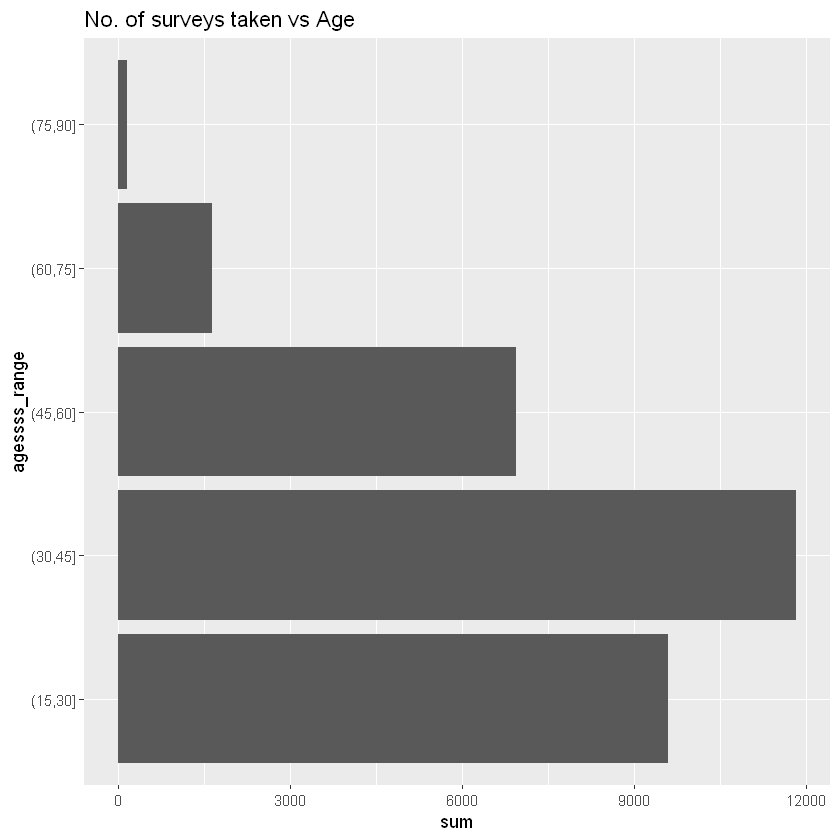

education,class,sum
Bachelors,>50K,2126
HS-grad,>50K,1617
Some-college,>50K,1336
Masters,>50K,918
Prof-school,>50K,406


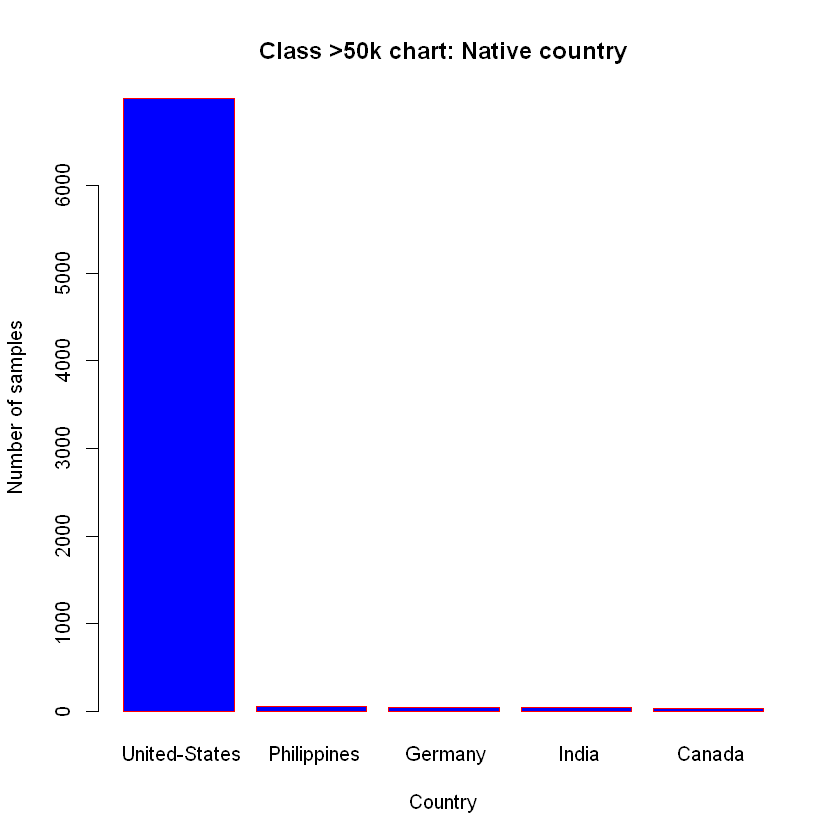

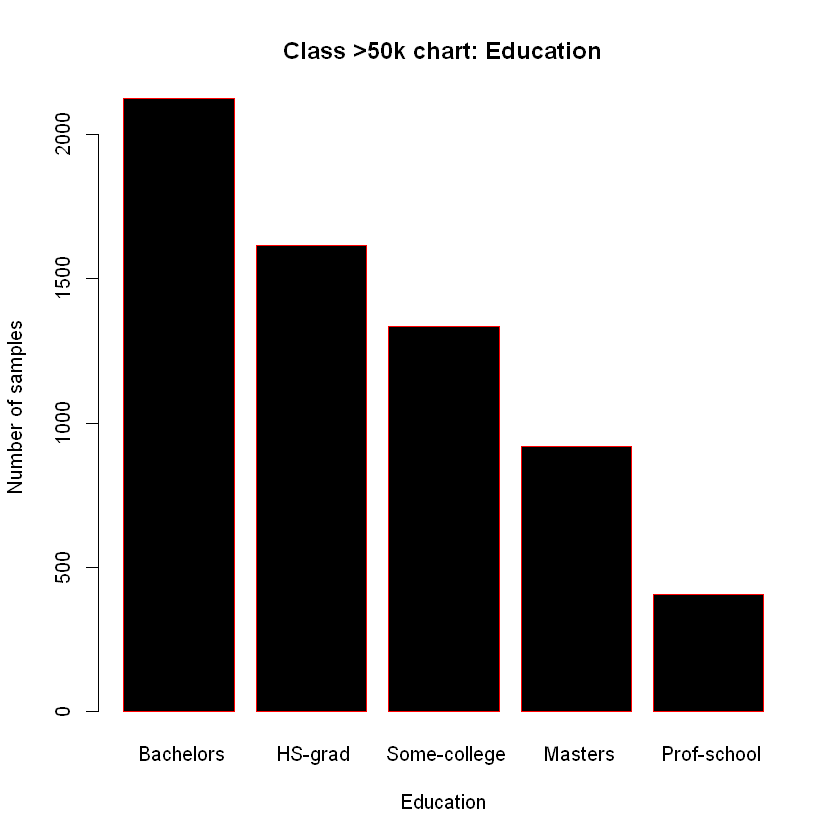

education,mean
10th,395.9146
11th,217.1908
12th,265.5013
1st-4th,113.9404
5th-6th,170.0382
7th-8th,244.7038
9th,354.2989
Assoc-acdm,554.9216
Assoc-voc,737.3443
Bachelors,1735.0287


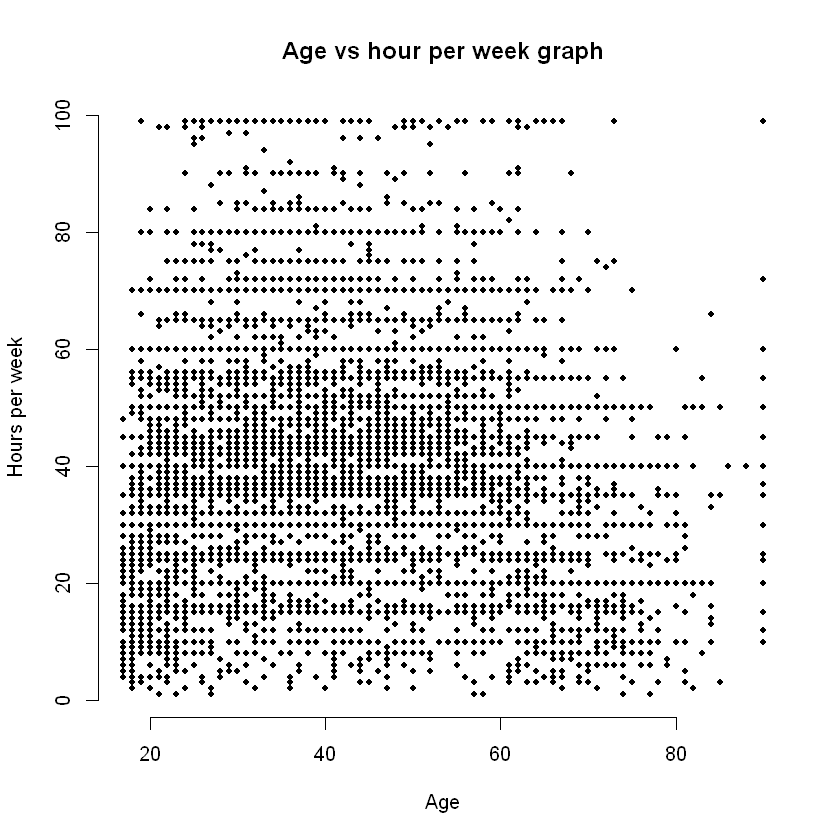

occupation,count
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584


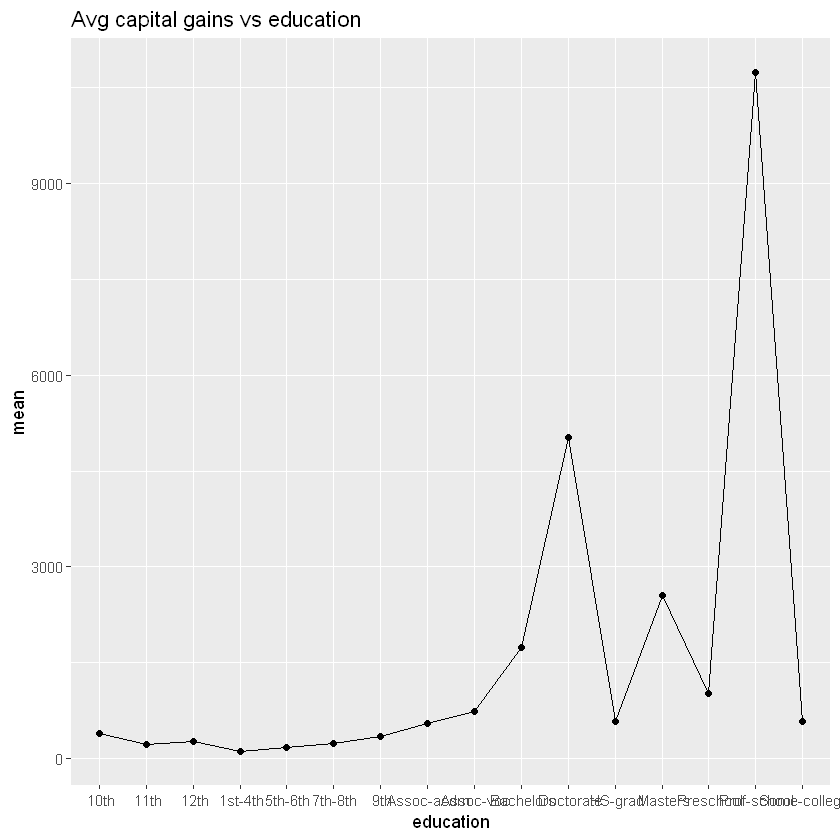

WorkClass,count
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
State-gov,1279
Self-emp-inc,1074


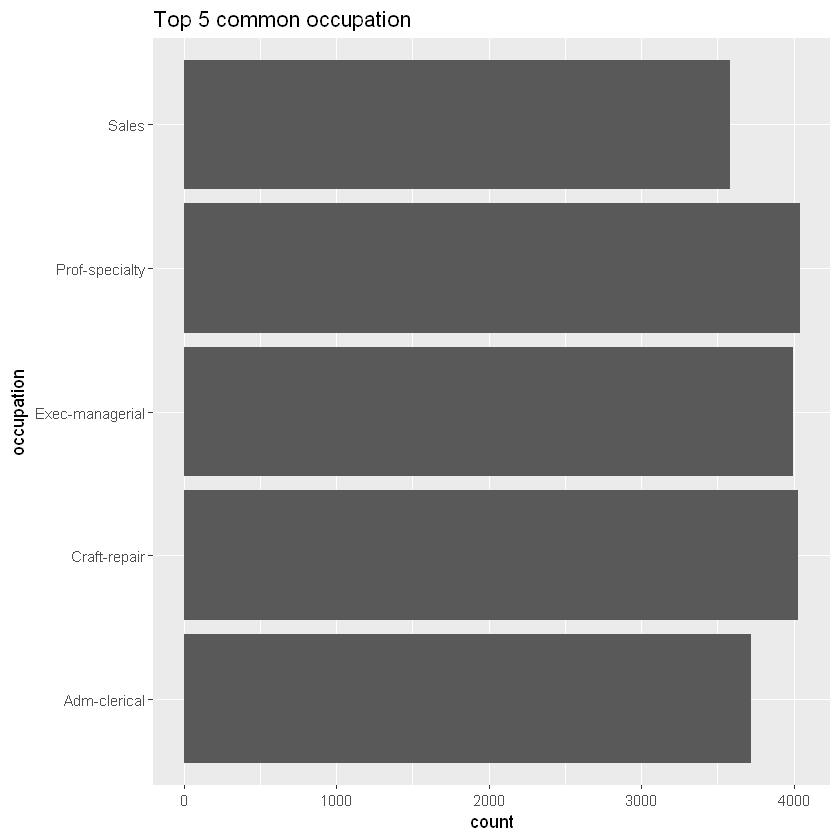

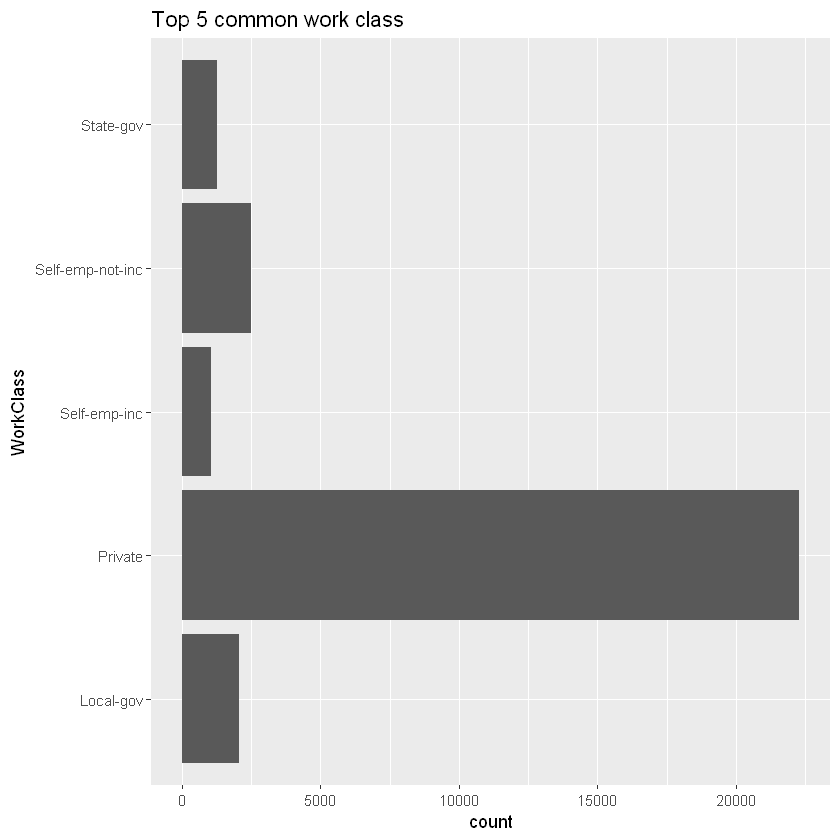

In [33]:
#Task 3-a: Draw a histogram for total number of surveys taken each month. Dislpay months with their corresponding 
#numbers(Eg: January is 1) 
#########################begin code for Task 3-a
print("Task 3-a")
mon <- as.numeric(as.factor(df_census$Survey_Month))
hist(mon,
main="Total survey taken each month",
xlab="Month",
ylab="Number of survey",
col="darkmagenta",
freq=FALSE
)

#Task 3-b: Draw a vertical bar chart for total number of surveys taken for each gender for each month. Display months 
#with their corresponding names.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b
df_task3b <- df_census %>% group_by(Survey_Month,gender) %>% summarise(count = n())
ggplot(data = df_task3b, aes(x = Survey_Month, y = count, fill = gender)) + geom_bar(stat = "identity",size = 1) + ggtitle("Gender vs Month Graph")

#Task 3-c: Draw a horizontal bar chart for number of surveys taken with respect to age feature keeping the age interval as 15.
# Remember to make the bar chart into a horizontal bar chart
#########################begin code for Task 3-c
agessss_range <- c(0,15,30,45,60,75,90,105)
df_task3c <- df_census %>% group_by(cut(df_census$Age, agessss_range)) %>% summarise(sum = n())
names(df_task3c)[names(df_task3c) == 'cut(df_census$Age, agessss_range)'] <- 'agessss_range'
ggplot(df_task3c, aes(x = agessss_range, y = sum)) + geom_col() + coord_flip() + ggtitle("No. of surveys taken vs Age")


#Task 3-d: Draw a "vertical" bar chart that lists the top-5 native-countries based on the number of samples with class >50K.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-d
df_task3d <- df_census %>% group_by(native.country,class) %>% summarise(sum = n()) #sum(as.numeric(fnlwgt))
sub_task3d <- subset(df_task3d, (class == ' >50K'))
order_task3d <- sub_task3d[order(-sub_task3d$sum),]
final_task3d <- head(order_task3d,5)
final_task3d
Hama <- final_task3d$sum
Mam <- final_task3d$native.country
barplot(Hama,names.arg=Mam,xlab="Country",ylab="Number of samples",col="blue",main="Class >50k chart: Native country",border="red")

#Task 3-e: Now repeat Task 3-d based on education (again top-5)
#########################begin code for Task 3-e
df_task3e <- df_census %>% group_by(education,class) %>% summarise(sum = n()) #sum(as.numeric(fnlwgt))
sub_task3e <- subset(df_task3e, (class == ' >50K'))
order_task3e <- sub_task3e[order(-sub_task3e$sum),]
final_task3e <- head(order_task3e,5)
final_task3e
Hama <- final_task3e$sum
Mam <- final_task3e$education
barplot(Hama,names.arg=Mam,xlab="Education",ylab="Number of samples",col="black",main="Class >50k chart: Education",border="red")

#Task 3-f: Draw a scatter plot for age vs hours per week.
#########################begin code for Task 3-f
x <- df_census$Age
y <- df_census$hours.per.week
plot(x, y, main = "Age vs hour per week graph",
     xlab = "Age", ylab = "Hours per week",
     pch = 20, frame = FALSE)

#Task 3-g: Draw a line chart showing average capital gain for each education category.
# X-axis : education category, Y-axis : the avg capital gain
#########################begin code for Task 3-g
df_task3h <- df_census %>% group_by(education) %>% summarise(mean = mean(capital.gain))
df_task3h
ggplot(df_task3h, aes(x = education, y = mean, group = 1)) + geom_point() + geom_line() + ggtitle("Avg capital gains vs education")

#Task 3-h: Draw a 'horizontal' bar chart for the top-5 most common occupation. 
#########################begin code for Task 3-h
df_task3h <- df_census %>% group_by(occupation) %>% summarise(count = n())
sub_task3h <- subset(df_task3h, (count != 'NA'))
order_task3h <- sub_task3h[order(-sub_task3h$count),]
final_task3h <- head(order_task3h,5)
final_task3h
ggplot(final_task3h, aes(x = occupation, y = count)) + geom_col() + coord_flip() + ggtitle("Top 5 common occupation")

#Task 3-i: Draw a 'horizontal' bar chart for the top-5 most common workclass. 
#########################begin code for Task 3-i
df_task3i <- df_census %>% group_by(WorkClass) %>% summarise(count = n())
sub_task3i <- subset(df_task3i, (count != 'NA'))
order_task3i <- sub_task3i[order(-sub_task3i$count),]
final_task3i <- head(order_task3i,5)
final_task3i
ggplot(final_task3i, aes(x = WorkClass, y = count)) + geom_col() + coord_flip() + ggtitle("Top 5 common work class")


[1] "From graph we know that people with a bachelor's degree worked in sepciality areas"


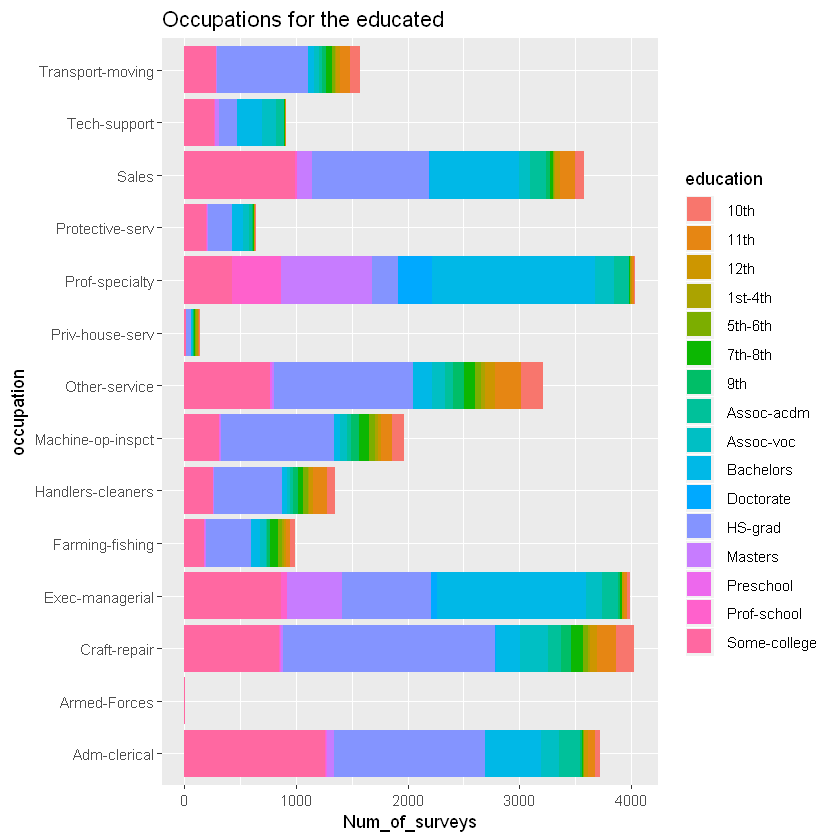

In [39]:
df_4b <- df_census %>% group_by(occupation,education) %>% summarise(Num_of_surveys = n())
ggplot(data = df_4b, aes(x = occupation, y = Num_of_surveys, fill = education)) + geom_bar(stat = "identity",size = 1) + ggtitle("Occupations for the educated")+coord_flip()
print("From graph we know that people with a bachelor's degree worked in sepciality areas")